In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# WEEK2 - Cellula intern

# By Youssef Magdy Abdelghany

In [2]:
data=pd.read_csv("/content/first inten project.csv")

In [3]:
data

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [4]:
data.drop(columns=["Booking_ID"], axis=1 , inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  object 
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  object 
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  object 
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  date o

In [6]:
#check the missing values
data.isnull().sum()

,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0
repeated,0


In [9]:
x=data.drop(columns=["booking status"],axis=1)
y=data["booking status"]

In [10]:
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()


categorical_features = x.select_dtypes(include=['object', 'category']).columns.tolist()

In [11]:
# Checking outliers per numeric column using IQR
outlier_summary = {}

for col in numeric_features:
    Q1 = np.percentile(data[col].dropna(), 25)
    Q3 = np.percentile(data[col].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # mask of outliers
    mask = (data[col] < lower_bound) | (data[col] > upper_bound)
    outlier_count = mask.sum()

    outlier_summary[col] = {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outlier_count,
        "Outlier %": round(outlier_count / len(data) * 100, 2)
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)

                            Q1     Q3    IQR  Lower Bound  Upper Bound  \
number of adults           2.0    2.0    0.0         2.00         2.00   
number of children         0.0    0.0    0.0         0.00         0.00   
number of weekend nights   0.0    2.0    2.0        -3.00         5.00   
number of week nights      1.0    3.0    2.0        -2.00         6.00   
car parking space          0.0    0.0    0.0         0.00         0.00   
lead time                 17.0  126.0  109.0      -146.50       289.50   
repeated                   0.0    0.0    0.0         0.00         0.00   
P-C                        0.0    0.0    0.0         0.00         0.00   
P-not-C                    0.0    0.0    0.0         0.00         0.00   
average price             80.3  120.0   39.7        20.75       179.55   
special requests           0.0    1.0    1.0        -1.50         2.50   

                          Outlier Count  Outlier %  
number of adults                10175.0      28.04  
numbe

In [12]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

In [13]:
## function that handles outliers
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, method='iqr', factor=1.5):
        self.method = method
        self.factor = factor
        self.bounds_ = {}

    def fit(self, x, y=None):
        x = pd.DataFrame(x)
        for col in x.columns:
            if self.method == 'iqr':
                Q1 = x[col].quantile(0.25)
                Q3 = x[col].quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - self.factor * IQR
                upper = Q3 + self.factor * IQR
                self.bounds_[col] = (lower, upper)
        return self

    def transform(self, x):
        x = pd.DataFrame(x)
        for col in x.columns:
            lower, upper = self.bounds_[col]
            x[col] = np.clip(x[col], lower, upper)
        return x

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
], remainder="passthrough")

In [16]:
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),  # select top 10 features
    ('smote', SMOTE(random_state=42)),   # handle class imbalance
    ('model', RandomForestClassifier(random_state=42))
])

In [17]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy')

print("CV Accuracy:", scores)
print("Mean CV Accuracy:", scores.mean())

CV Accuracy: [0.86757613 0.87460383 0.86840292 0.876533   0.87363924]
Mean CV Accuracy: 0.8721510265950118


In [18]:
pipeline.fit(x, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['number of adults',
                                                   'number of children',
                                                   'number of weekend nights',
                                                   'number of week nights',
                                                   'car parking space',
                                                   'lead time', 'repeated',
                                                   'P-C', 'P-not-C',
                                                   'average price ',
                                                   'special requests']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type of meal', 'room type',
                                                   'market segment type',
                                                   'date of reservation'])])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

In [19]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
y_pred_cv = cross_val_predict(pipeline, x, y, cv=5)
print(classification_report(y, y_pred_cv))
#Precision for Canceled = 0.78

#Of all reservations predicted as Canceled, 78% were actually canceled.

#Recall for Canceled = 0.81

#Of all actual Canceled reservations, 81% were correctly identified.

              precision    recall  f1-score   support

    Canceled       0.79      0.81      0.80     11889
Not_Canceled       0.91      0.90      0.90     24396

    accuracy                           0.87     36285
   macro avg       0.85      0.85      0.85     36285
weighted avg       0.87      0.87      0.87     36285



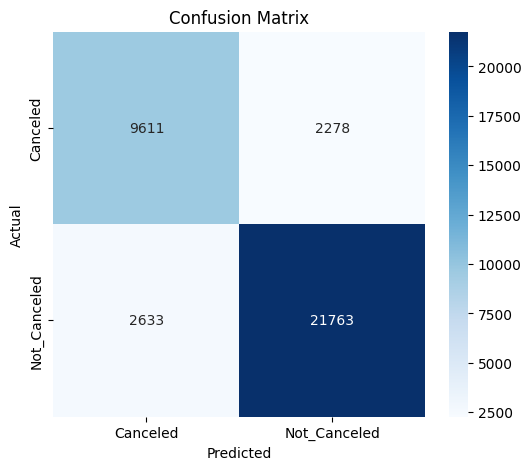

In [ ]:
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y, y_pred_cv, labels=['Canceled', 'Not_Canceled'])

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Canceled','Not_Canceled'],
            yticklabels=['Canceled','Not_Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0 0 0 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0 0 0 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0 0 0 0 0 0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, U

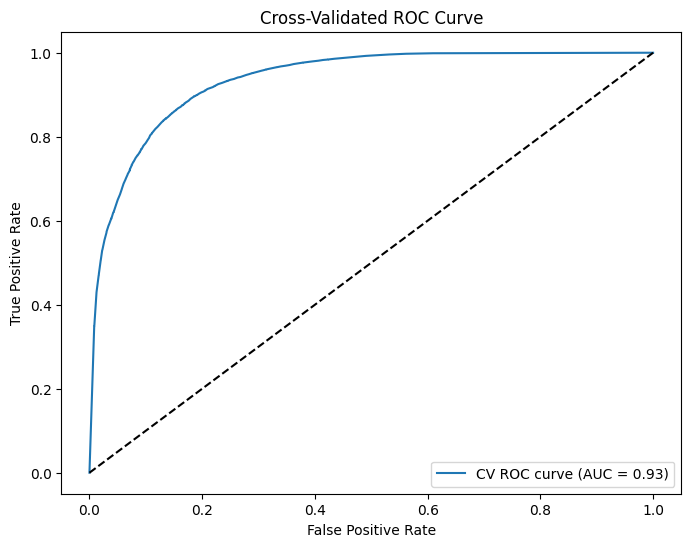

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Get cross-validated predicted probabilities
y_prob_cv = cross_val_predict(pipeline, x, y, cv=cv, method='predict_proba')[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, y_prob_cv, pos_label='Not_Canceled')
roc_auc = roc_auc_score(y, y_prob_cv)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'CV ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curve')
plt.legend(loc='lower right')
plt.show()
